In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [310]:
result = []

## 1) Получите данные и загрузите их в рабочую среду.

In [311]:
data = datasets.fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

## 2) Проверьте данные на наличие пропусков.

In [312]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.assign(MedHouseVal = data.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [313]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 3) Разделите выборку на обучающее и тестовое подмножества. 80/20

In [314]:
X = df[data.feature_names]
Y = df[data.target_names]

In [315]:
def get_score(X, Y, com, random_seed=15, model=None):
    if model is None:
        model = LinearRegression()

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, Y_train)

    return com, r2_score(Y_test, model.predict(X_test)), root_mean_squared_error(Y_test, model.predict(X_test))

## 4) Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [316]:
result.append(get_score(X, Y, "Исходные данные"))
print("R2 - " + str(result[0][1]))
print("RMSE - " + str(result[0][2]))

R2 - 0.594578700066559
RMSE - 0.7342283181120794


## 5) Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [317]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i]) 

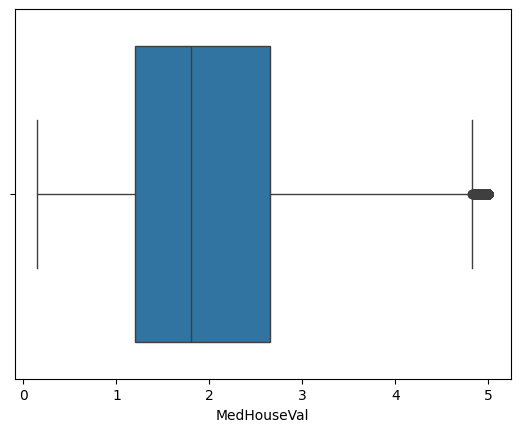

In [318]:
get_boxplot(df, columns=['MedHouseVal'])

<Axes: >

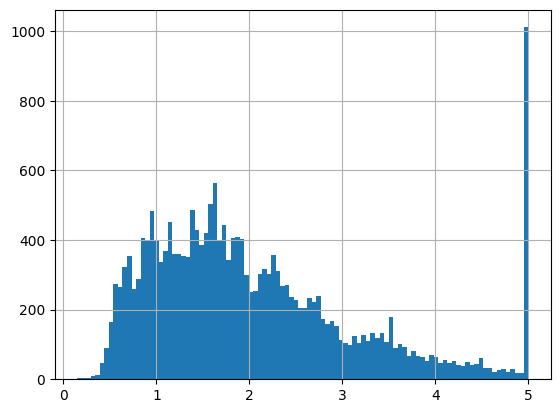

In [319]:
df['MedHouseVal'].hist(bins=100)

Судя по этим графикам, выбросы присутствуют

## 6) Посчитайте и выведите корреляционную матрицу.

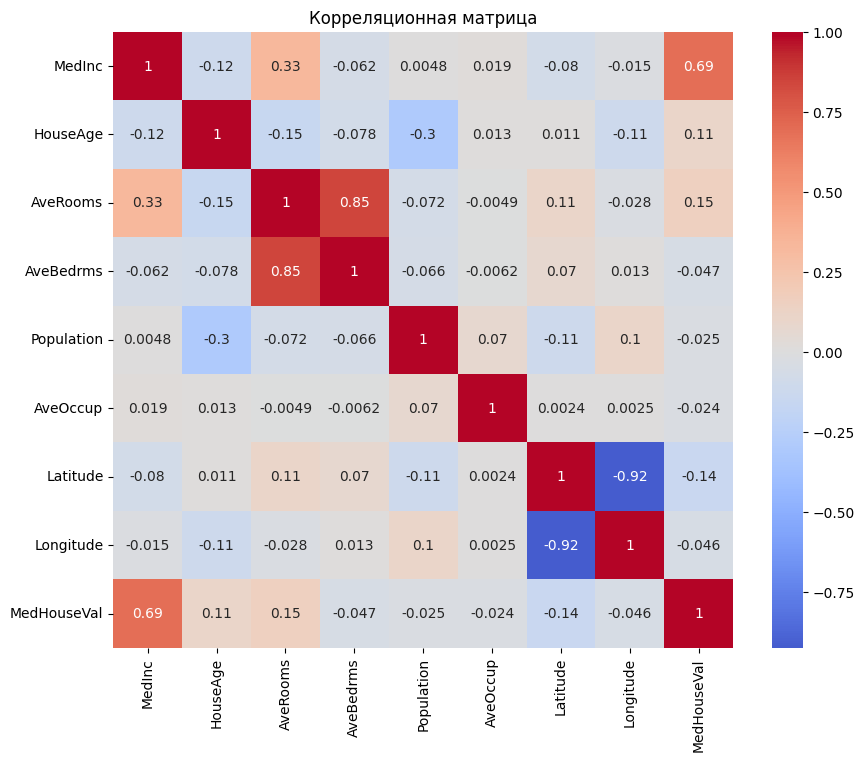

In [320]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

# Настройка заголовка и отображение графика
plt.title('Корреляционная матрица')
plt.show()

На матрице видно, что наша целевая переменная очень взаимосвязана с признаком "MedInc". Поэтому мы удалим этот признак, чтобы модель не отвлекалась на нее

In [321]:
df = df.drop("MedInc", axis=1)
df

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [322]:
X = df[["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
Y = df[data.target_names]

result.append(get_score(X, Y, "Удалена колонка с большой взаимосвязью"))
print("R2 - " + str(result[1][1]))
print("RMSE - " + str(result[1][2]))

R2 - 0.39667608139791977
RMSE - 0.8956805041792857


## 7) Исследуйте оставленные признаки на выбросы.

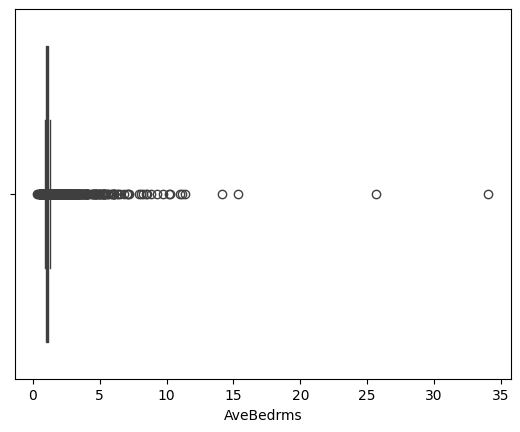

In [323]:
get_boxplot(df, columns=['AveBedrms'])

In [324]:
df = df[df["AveBedrms"] < 13]

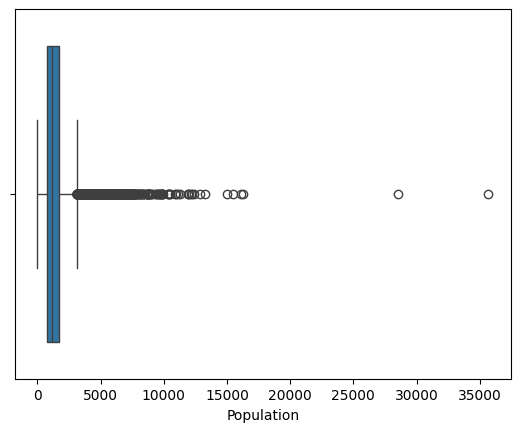

In [325]:
get_boxplot(df, columns=['Population'])

In [326]:
df = df[df["Population"] < 20000]

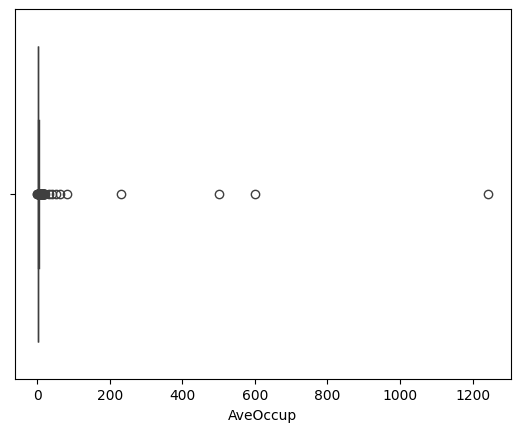

In [327]:
get_boxplot(df, columns=['AveOccup'])

In [328]:
df = df[df["AveOccup"] < 30]

Все выбросы были удалены

In [329]:
X = df[["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
Y = df[data.target_names]

result.append(get_score(X, Y, "Удалены выбросы"))
print("R2 - " + str(result[0][1]))
print("RMSE - " + str(result[0][2]))

R2 - 0.594578700066559
RMSE - 0.7342283181120794


## 8) Измените несколько признаков на выбор математически.

In [330]:
df["Population"] = np.log(df["Population"])
df["AveOccup"] = np.square(df["AveOccup"])

In [331]:
X = df[["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
Y = df[data.target_names]

result.append(get_score(X, Y, "Были математически изменены 2 признака"))
print("R2 - " + str(result[0][1]))
print("RMSE - " + str(result[0][2]))

R2 - 0.594578700066559
RMSE - 0.7342283181120794


## 9) Сформулируйте выводы по проделанной работе.

Была выявлена колонка с большей взаимосвязью и удалена. С помощью BoxPlot были найдены и удалены выбросы. И в конце были проведины математические манипуляции с 2-мя признаками.

In [332]:
result_df = pd.DataFrame(result, columns=["Изменения", "R2", "RMSE"])
result_df

,Изменения,R2,RMSE
0,Исходные данные,0.594579,0.734228
1,Удалена колонка с большой взаимосвязью,0.396676,0.895681
2,Удалены выбросы,0.469729,0.853434
3,Были математически изменены 2 признака,0.428023,0.886360


По результатам, самым результативным оказалось удаление колонки. Удаление выбросов наоборот сделали хуже, но изменение признаков улучшили ситуацию. 